## Preamble

#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

#### Get essentials

Import text and graph modules for analysis, and css for display

In [2]:
from module_update import update, css, code_toggle, printmd

In [3]:
css()

### Module

In [38]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)
import nbtext as nb   # import the whole module, but individual commands can be imported separately
import graph_networkx_louvain as gnl 
import networkx as nx
from graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Updated file `/home/lars/graph_networkx_louvain.py`

Updated file `/home/lars/nbtext.py`

# Aggregation data

### Trend lines, n-grams, word graphs




### Trend lines

Data up to trigrams.

In [8]:
nb.nb_ngram("spise middag, lage middag", years=(1950, 2010), smooth=1).head(10)

,spise middag,lage middag
1950,0.000391,0.000013
1951,0.000417,0.000013
1952,0.000336,0.000016
1953,0.000297,0.000018
1954,0.000273,0.000014
1955,0.000225,0.000012
1956,0.000254,0.000020
1957,0.000167,0.000011
1958,0.000170,0.000015
1959,0.000264,0.000019


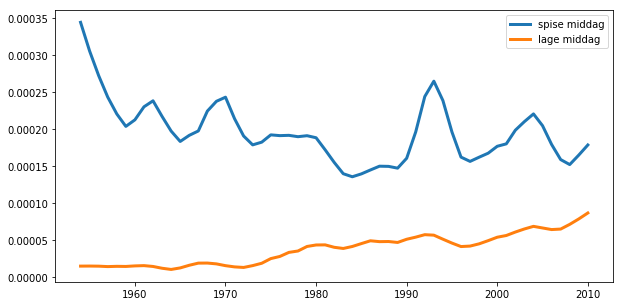

In [11]:
nb.nb_ngram("spise middag, lage middag", years=(1950, 2010), smooth=5).plot(figsize=(10,5), lw=3);

# nb.difference()

Cascaded division. The command `difference(A, B, C, D)` computes 

$$\textrm{difference}(A,B,C,D) = \frac{\frac{A}{B}}{\frac{C}{D}}$$

So it compares the ratio of the first two with the ratio of the second two. For a certain selection of arguments, this leads to a simple interpretations. If *difference* is less than 1, it means the numerator ratio is smaller than the denominator.  We use to compare contexts, and  see how contexts make a difference. For example is *w* and *v* are two words, and *C* is a context, *difference* can be used to see if the context is associated with *w* or *v*:

If $\textrm{difference}(C(w),C(v),w,v) > 1$ then $C$ is associated with $w$, otherwise with $v$. In this case, we can say that the context $C$ prefers $w$ for $v$. 

In [14]:
# measure difference between men and women
nb.difference('han gråter', 'hun gråter', 'han', 'hun')

0.24425557325619277

In [15]:
# measure difference between men and women
nb.difference('han føler', 'hun føler', 'han', 'hun')

0.5822231816444254

In [16]:
# measure difference between men and women
nb.difference('han påstår', 'hun påstår', 'han', 'hun')

1.3822914618986304

In [21]:
# measure difference between men and women
nb.difference('han hevder', 'hun hevder', 'han', 'hun')

1.946838014227948

At this point it may be helpful to just add in the pronouns in a template and study different contexts

In [33]:
diff = lambda x: nb.difference("han " + x, "hun " + x, "han", "hun")
diffseries = lambda s: pd.Series(list(map(diff, s)), index = s)

The examples above can be formulated by specifying only the contexts

In [65]:
he_she = diffseries("gråter påstår føler hevder sover arbeider snorker kjører".split())

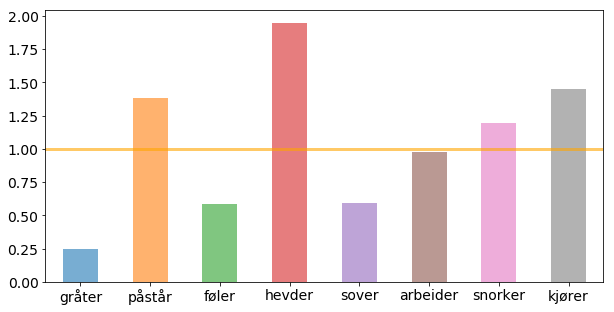

In [66]:
he_she.plot(kind='bar', figsize = (10,5), alpha = 0.6, rot = 0, fontsize=14 )
plt.axhline(y=1, linewidth=3, color='orange', alpha=0.6)

In the case above, it is clear that $\textrm{'hun gråter'}$ (she sobs) has a much higher frequency than expected, by looking at the ratio $\frac{\textrm{'han'}}{\textrm{'hun'}}$.

In [13]:
nb.difference('rike menn', 'rike kvinner', 'menn', 'kvinner')

3.9150311882029563

In [67]:
# measure difference between men and women
nb.difference('fattige menn', 'fattige kvinner', 'menn', 'kvinner')

0.2821076768706094

In [68]:
# measure difference between men and women
nb.difference('smarte menn', 'smarte kvinner', 'menn', 'kvinner')

'Mangler noen data - har bare for: smarte kvinner, menn, kvinner'

# Word models

Words as graphs. Three languages, Norwegian, English and German.


#### Norwegian

In [75]:
G = nb.make_graph('jern', cutoff = 10)

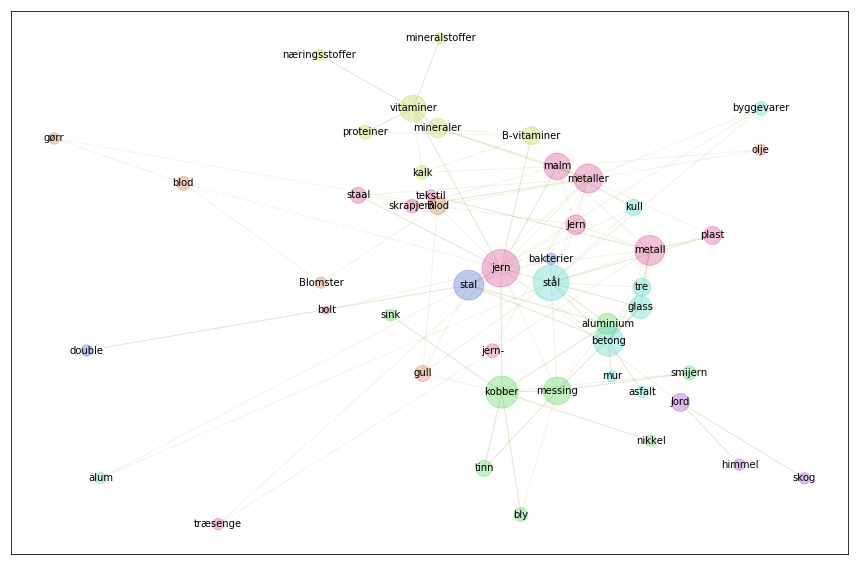

In [76]:
gnl.show_graph(G, spread = 1.9)

In [77]:
gnl.show_communities(G)

vitaminer-mineraler :  vitaminer, mineraler, B-vitaminer, kalk, proteiner, næringsstoffer, mineralstoffer

kobber-messing :  kobber, messing, aluminium, tinn, bly, smijern, sink, nikkel

stål-betong :  stål, betong, glass, tre, kull, byggevarer, alum, mur, asfalt

stal-double :  stal, double, bakterier

Jord-himmel :  Jord, himmel, skog

jern-metall :  jern, metall, metaller, malm, Jern, plast, staal, jern-, skrapjern, træsenge, tekstil, bolt

Blod-gull :  Blod, gull, blod, gørr, Blomster, olje



#### English

In [78]:
G = nb.make_graph('iron', lang='eng')

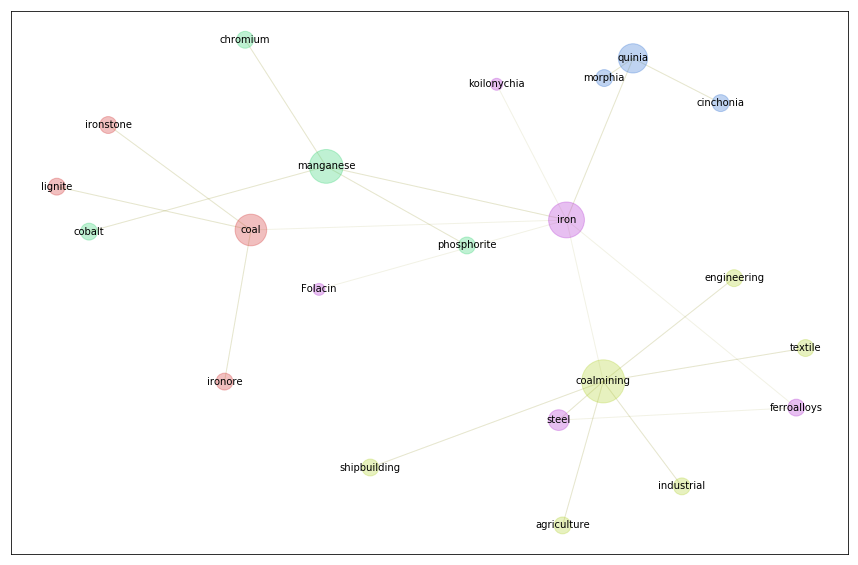

In [79]:
gnl.show_graph(G, spread = 1.9)

In [80]:
gnl.show_communities(G)

coalmining-industrial :  coalmining, industrial, textile, shipbuilding, agriculture, engineering

manganese-chromium :  manganese, chromium, cobalt, phosphorite

quinia-cinchonia :  quinia, cinchonia, morphia

iron-steel :  iron, steel, ferroalloys, Folacin, koilonychia

coal-ironore :  coal, ironore, lignite, ironstone



#### German

In [90]:
G = nb.make_graph('Eisen', lang='ger')

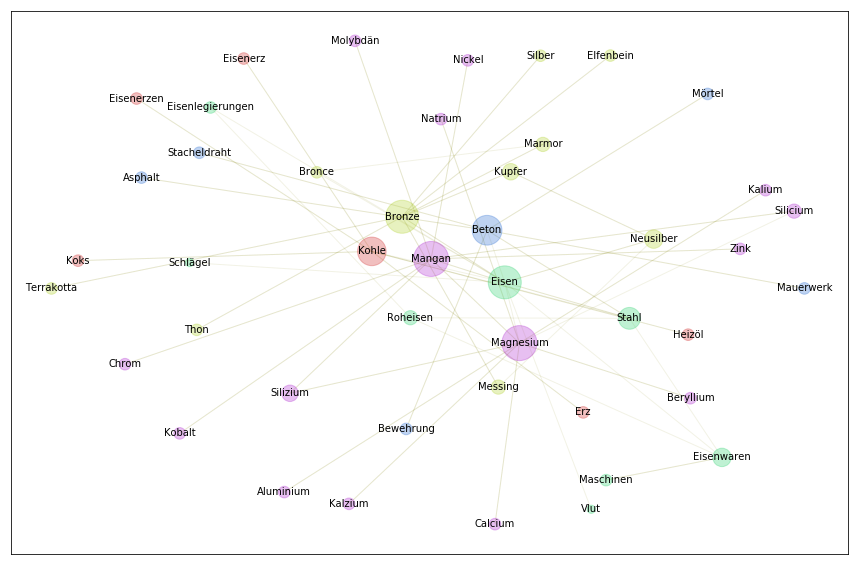

In [91]:
gnl.show_graph(G, spread = 1.9)

In [92]:
gnl.show_communities(G)

Bronze-Neusilber :  Bronze, Neusilber, Kupfer, Marmor, Messing, Bronce, Terrakotta, Silber, Thon, Elfenbein

Eisen-Stahl :  Eisen, Stahl, Eisenwaren, Roheisen, Eisenlegierungen, Maschinen, Schlägel, Vlut

Beton-Stacheldraht :  Beton, Stacheldraht, Asphalt, Mörtel, Bewehrung, Mauerwerk

Mangan-Magnesium :  Mangan, Magnesium, Silizium, Silicium, Kalzium, Molybdän, Nickel, Calcium, Aluminium, Natrium, Beryllium, Zink, Kalium, Chrom, Kobalt

Kohle-Eisenerz :  Kohle, Eisenerz, Eisenerzen, Koks, Erz, Heizöl



## Corpus and collocations

Define a corpus using metadata, like Deweys decimal system. [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) is good for that.

Searching using live spec.

In [94]:
nb.get_konk('Indholdsfortegnelse', {'size':5, 'yearfrom':1780, 'yearto':1870})

"Kurtz, Joh. Heinr.,Lærebog i kirkehistorien for studerende,1859",None,Indholdsfortegnelse,.
"Kurtz, Joh. Heinr.,Lærebog i kirkehistorien for studerende,1859",None,Indholdsfortegnelse,.
"Kurtz, Joh. Heinr.,Lærebog i kirkehistorien for studerende,1859",None,Indholdsfortegnelse,.
"Kurtz, Joh. Heinr.,Lærebog i kirkehistorien for studerende,1859",None,Indholdsfortegnelse,.
"Kurtz, Joh. Heinr.,Lærebog i kirkehistorien for studerende,1859",None,Indholdsfortegnelse,.
",Lovsamling for Island,1863",518 ( med Motiver og,Indholdsfortegnelse,) . Qvart-Forr . for
",Lovsamling for Island,1863",977 — 997 ( med,Indholdsfortegnelse,og Motiver ) . Qvart-
",Betænkning angaaende Forslag til en ny Lønningsmaade for geistlige Embedsmænd og Betjente,1846",None,Indholdsfortegnelse,.
"Siebke, Johan Heinrich Spalckhawer,Kortfattet Lærebog i Dyrerigets Naturhistorie til Skolebrug,1851",None,Indholdsfortegnelse,.
"Schmid, Heinrich.,Lærebog i Kirkehistorien,1853",None,Indholdsfortegnelse,.


Specify more metadata:

In [98]:
nb.get_konk('fiskeskinn', {'size':5, 'yearfrom':1950, 'ddk':"641%", 'yearto':2000})

"Engh, André,Kjøkken-ordbok,1972",med hele ben i og,fiskeskinn,omkring eller boller med bras-skinn
",Vareleksikon: Næringsmidler,1955",nyttes til klareskinn . Større,fiskeskinn,som særlig ved filetproduksjonen blir
"Boxer, Arabella,Krydder,1999",None,fiskeskinn,", ben og avskjær I"
"Boxer, Arabella,Krydder,1999",Start med fiskekraften . Legg,fiskeskinn,"og annet avskjær , de"
"Carrier, Robert,All verdens livretter,1967",", og husk at brent",fiskeskinn,smaker virkelig ille . Vend
",Mattradisjoner fra Akershus,1998",små oppklipte biter av tørket,fiskeskinn,. Når en skulle koke


In [99]:
nb.get_konk('fiskeskinn', {'size':5, 'yearfrom':1950, 'author': 'juelsen%', 'ddk':"641%", 'yearto':2000})

"Juelsen, Stig,NB,1998",et noe anstrengt forhold til,fiskeskinn,. Det er liksom ikke
"Juelsen, Stig,NB,1998",endre din oppfatning av hvorvidt,fiskeskinn,er godt å spise eller
"Juelsen, Stig,NB,1998",gjesten skal kunne nyte sprøstekt,fiskeskinn,. Jeg har ikke tall


# Keywords within a corpus

Here we go about finding keywords in a corpus

In [109]:
korpus = nb.get_urn({'words':['krig'], 'limit':200, 'year':1920, 'next':130})

In [110]:
len(korpus)

200

In [111]:
nb.frame(nb.metadata(korpus))

,0,1,2,3,4,5,6
0,2009061904022,"Hansen, Knut Ingar",1975,O-fag,"Fabritius;Oslo : Fabritius, 1972- .",nob,
1,2010053103014,"Brantenberg, Tore",1997,Byboligen,Norsk arkitekturforl.;Den norske stats husbank,nob,
2,2010120308003,"Hoh, Diane",1995,Farlige følelser,SEMIC/nordisk forl.,nob,eng
3,2008112404092,"Wikborg, Tone",2001,Gustav Vigeland,Gyldendal,nob,
4,2014101408007,"Rørvik, John",1933,Viknaværinger i Amerika,Laget,nob,
5,2012012408046,"Kristensen, Fred.",1958,Skoger sparebank 1859-1959,Banken,nob,
6,2013070308058,"Schaeffer, Werner",1941,Krig mot kvinner og barn,Herolden,nob,ger
7,2011021508137,"Ekman, Ulf",1996,Født til seier,Livets ord Norge,nob,
8,2008082100016,"Pauss, B.",1920,Norsk lesebok for middelskolen,"Steenske;Kristiania : Steenske, 1920-",nob,
9,2008020604083,"Hagenlund, Sunniva",1994,Portrett av et vennskap,Aschehoug,nob,


Fetching corpus as a document-term matrix

In [ ]:
corpus_agg = nb.get_corpus_text([x[0] for x in korpus])

In [43]:
coll = nb.urn_coll('kaffe', urns = korpus, before = 2, after = 2)

In [44]:
coll.sort_values(by=0, ascending=False).head(20)

,0
og,593
.,428
",",419
en,376
kopp,298
med,222
drakk,127
i,121
på,121
til,111


Sammenling korpuset med en referanse, her tar vi hele bokhylla

In [28]:
totalen = nb.frame(nb.totals(5000))
totalen.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583




## Ordskyer

In [46]:
diff = (coll**1.01/totalen).sort_values(by=0, ascending = False)

In [47]:
diff

,0
drakk,0.000223
drikker,0.000094
drikke,0.000043
varm,0.000029
melk,0.000028
sukker,0.000022
lagde,0.000021
te,0.000019
kald,0.000018
svart,0.000016


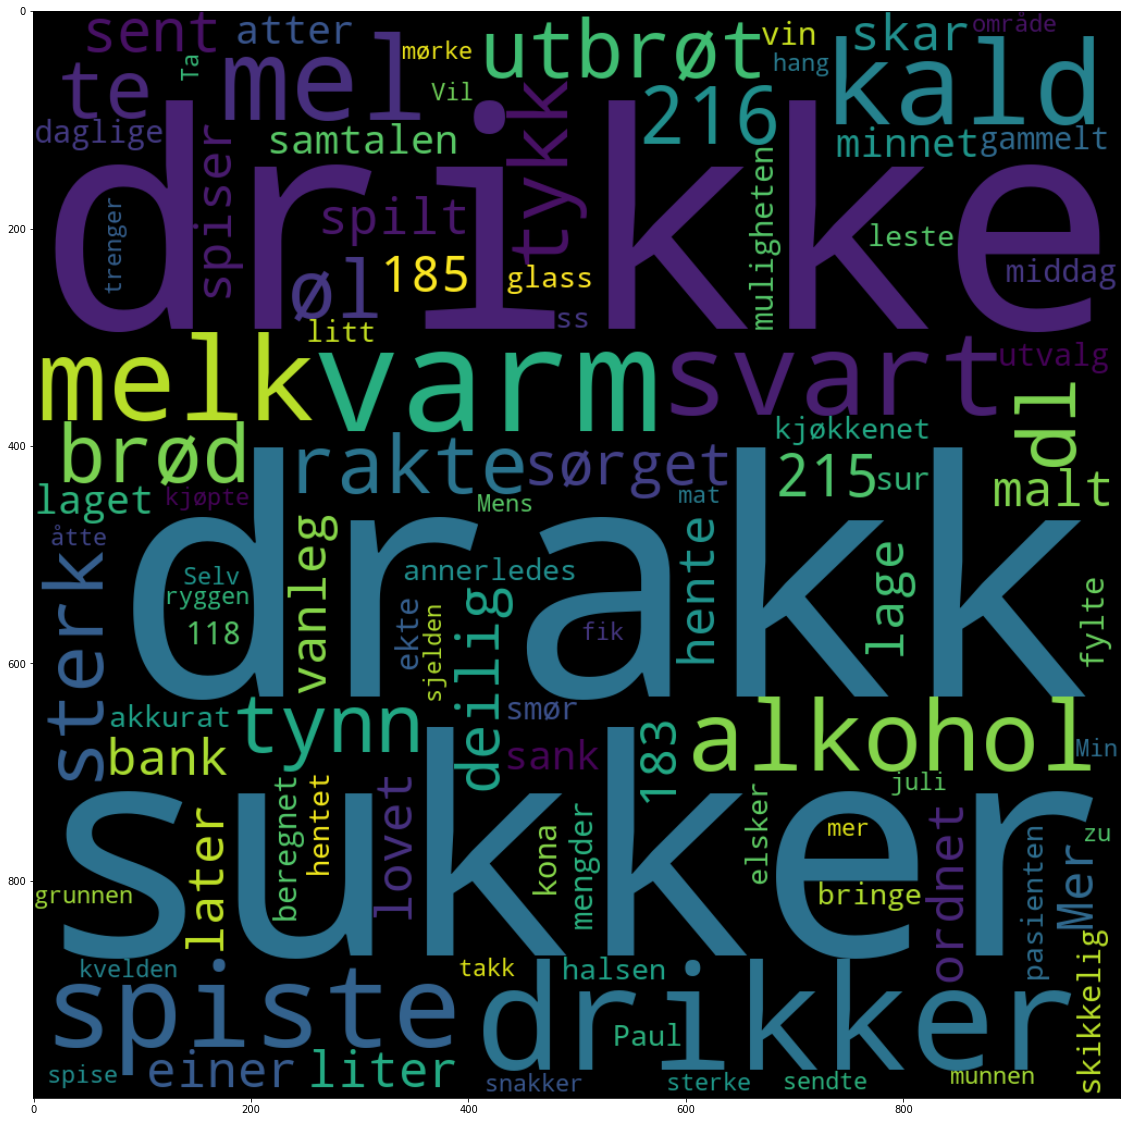

In [39]:
nb.cloud(diff[:100])

# Dokument-term-matriser

### Analyse - viktigste ord

Bygg et korpus

In [70]:
URNer = nb.get_urn({'words': ['crepe', 'Crepe', 'crêpe'],  'year':1960, 'next':60})

In [72]:
# hent term-matrisen med kommandoen nb.get_corpus_text( ... liste av urner ...)
dtm = nb.get_corpus_text([x[0] for x in URNer])

In [74]:
nb.heatmap(dtm.sort_values(by = dtm.columns[0], ascending = False)[:50])

,2009033104074,2010111808011,2010062508068,2013032008041,2010021604058,2014090306095,2007080701001,2013070408006,2014073106039,2007051404058
.,6180,1206,10969,4266,31160,4454,13931,6927,281,6139
",",3264,26611,6723,2118,3880,5058,5475,6782,205,5795
og,2149,125,2914,990,408,1403,112,3008,219,2160
å,2031,35,2432,91,578,51,779,560,97,831
i,1791,610,2542,1042,2499,529,648,2635,176,2307
-,1782,91,3557,2051,2377,1857,3091,2189,30,23
en,1573,86,2254,148,1716,84,368,1504,74,1952
på,1565,446,1933,154,1825,98,432,625,38,800
til,1542,194,2178,395,1182,618,297,1181,110,1588
det,1458,23,2824,242,1070,35,100,1538,93,2551


## Bruk Corpus-klassen

### Eksempel 1

Bygg korpus med kommandoen `nb.Corpus(... metadata ...)`.

In [41]:
korpus = nb.Corpus(ddk='641%', period = (1990, 2010))

Det lages implisitt et referansekorpus fra samme periode som det sammenlignes med

In [56]:
korpus.difference(doc_exp = 1.1, freq_exp = 1.1)

Lag en ordsky:

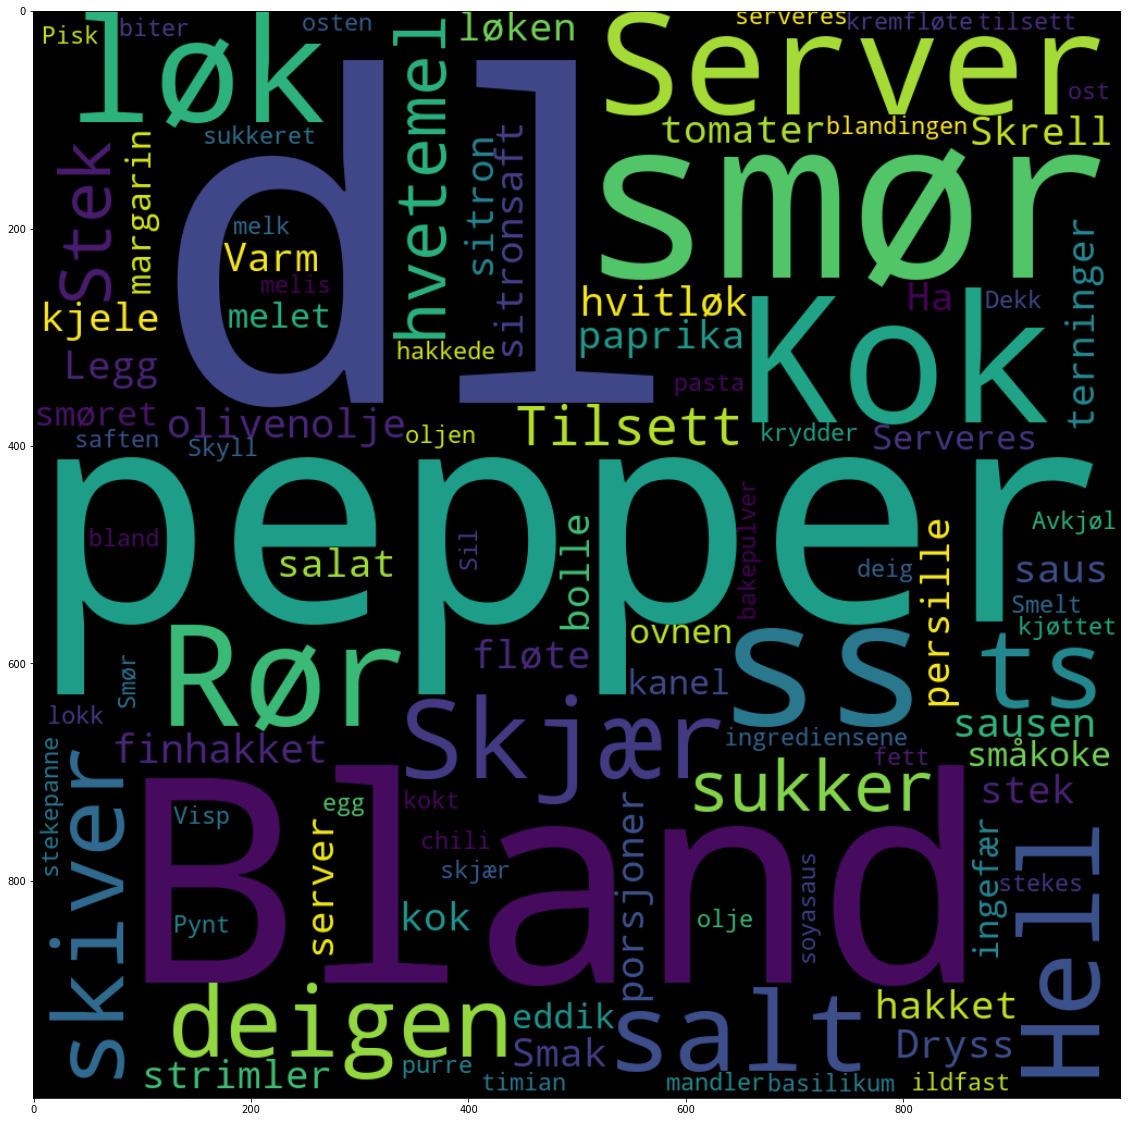

In [43]:
nb.cloud(korpus.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

### Eksempel 2

In [44]:
korpus1 = nb.Corpus(ddk='700%', period = (1990, 2010))

In [45]:
korpus1.difference(doc_exp = 1.1, freq_exp = 1.1)

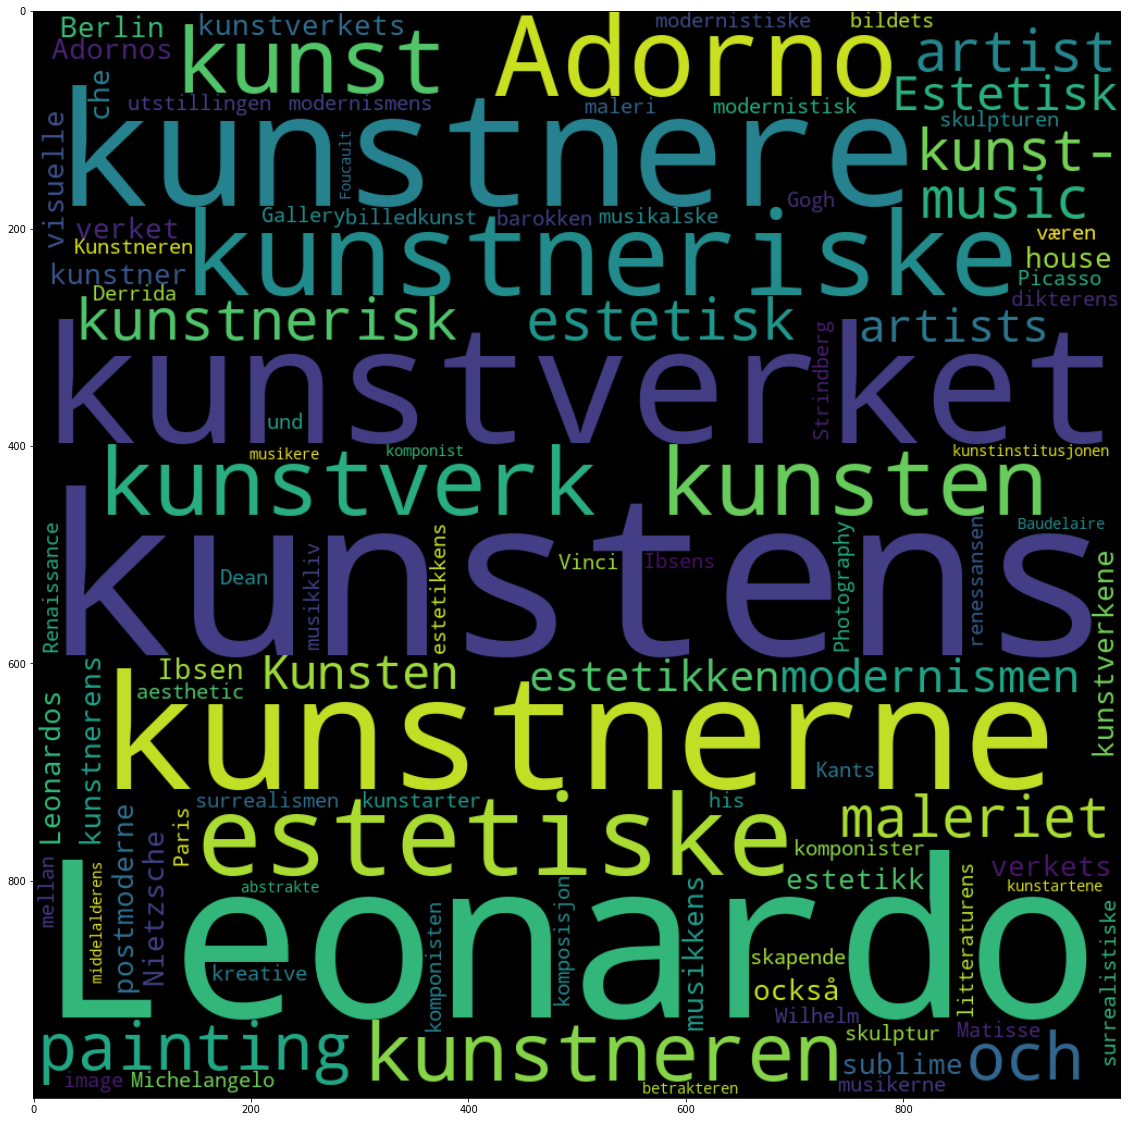

In [46]:
nb.cloud(korpus1.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [47]:
korpus2 = nb.Corpus(ddk='230%', period = (1990, 2010))

In [48]:
korpus2.difference(doc_exp = 1.1, freq_exp = 1.1)

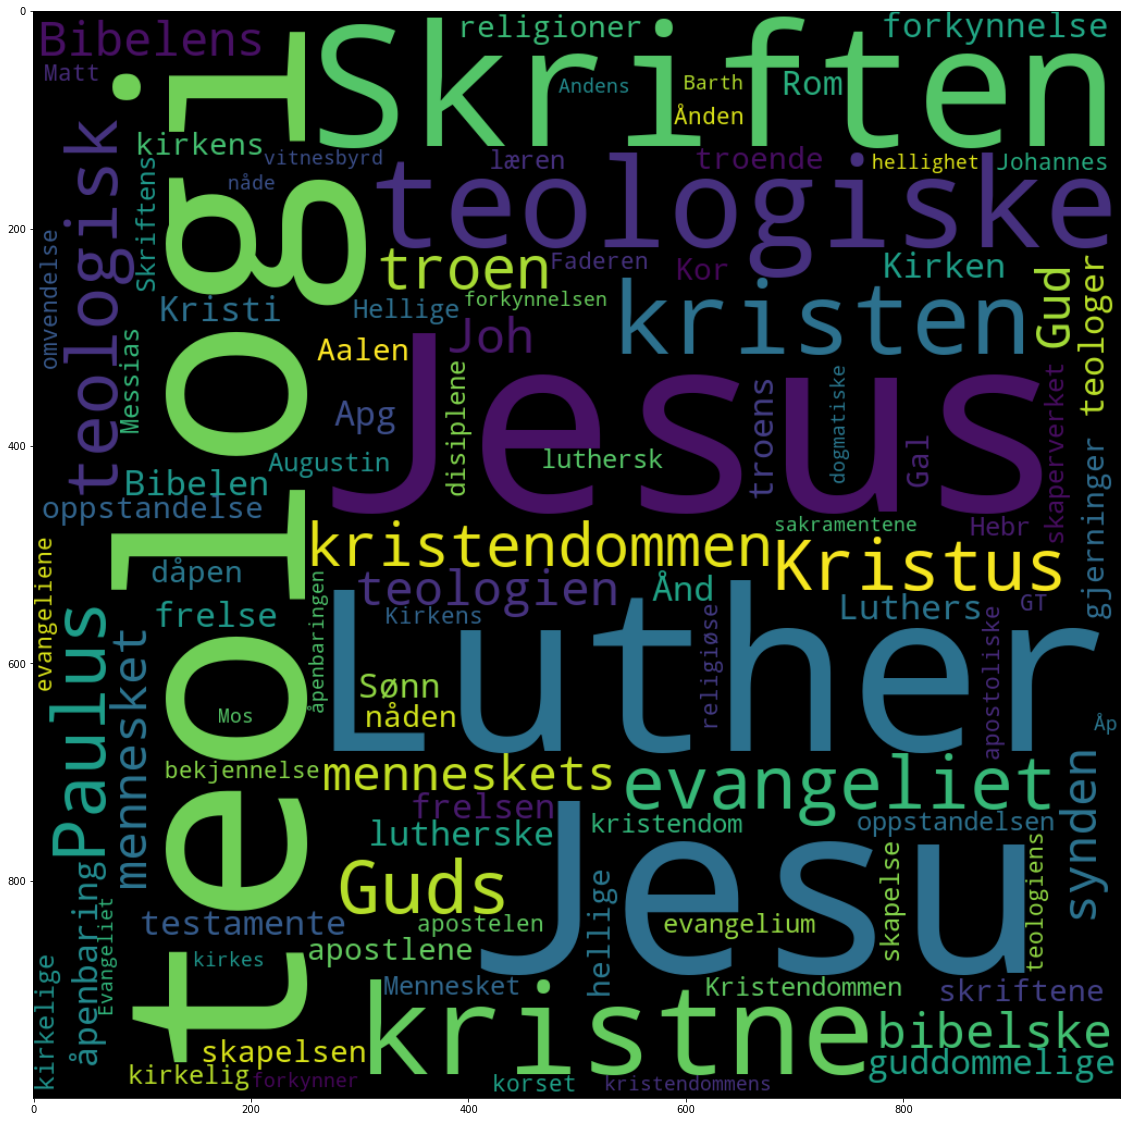

In [49]:
nb.cloud(korpus2.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

In [50]:
korpus3 = nb.Corpus(ddk='004%', period = (1990, 2010))

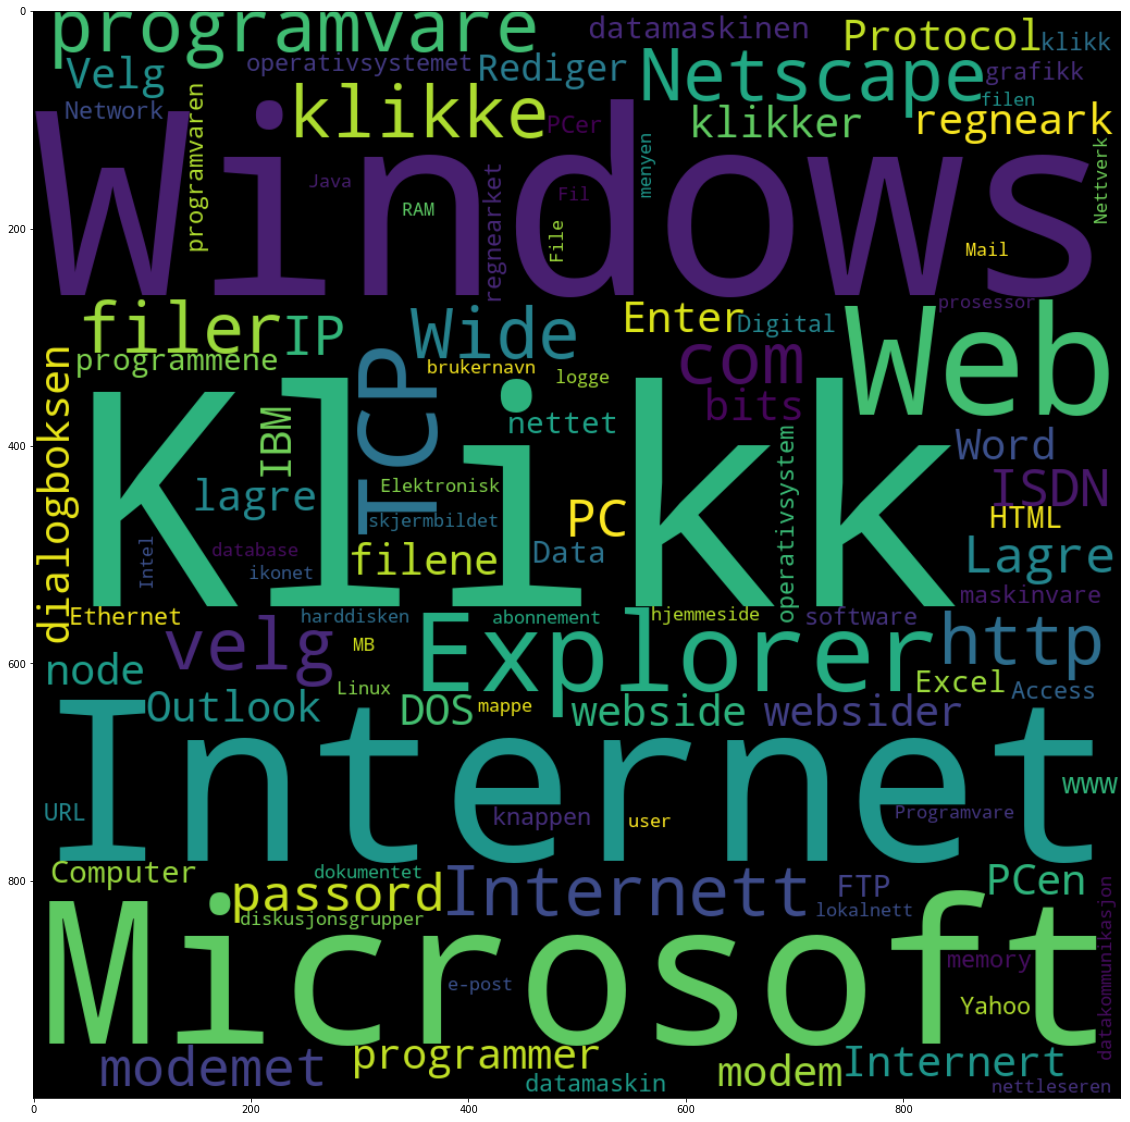

In [51]:
nb.cloud(korpus3.difference(doc_exp=1.1, freq_exp=1.1, aslist=False)[:100])

## Wildcardsearch

In [6]:
nb.sorted_wildcardsearch({
    'word':'al*ays', 
    'factor':4, 
    'freq_lim':50, 
    'limit':100
})

,al*ays
always,280944
alvvays,399
allways,357
alvays,253
al-ways,125
alleyways,119
alivays,74
al-Qays,63
aluays,57
